In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import string
import spacy
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('Elon_musk.csv',error_bad_lines=False,sep=',',encoding='cp1252')

In [3]:
df

,Unnamed: 0,text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df = df.drop(columns=['Unnamed: 0'],axis=1)

In [5]:
df

,text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


# regular expression

In [6]:
import re     
import string

In [7]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)


In [8]:
df['text'] = df.text.apply(clean)

In [9]:
df['text']

0                                             im an alien
1       idaacarmack ray tracing on cyberpunk with hdr ...
2                        joerogan spotify great interview
3                                  doge is underestimated
4       teslacn congratulations tesla china for amazin...
                              ...                        
1994    flcnhvy true it sounds so surreal but the nega...
1995    ppathole make sure to read ur terms amp condit...
1996                    teslagong ppathole samwise gamgee
1997                   ppathole altho dumb and dumber is 
1998                              progress update august 
Name: text, Length: 1999, dtype: object

In [10]:
dataset = df.copy()

# remove both the leading and the trailing character

In [11]:
df = [x.strip() for x in df.text]

In [13]:
# removes empty strings
df = [x for x in df if x]

In [14]:
df[0:10]

['im an alien',
 'idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it',
 'joerogan spotify great interview',
 'doge is underestimated',
 'teslacn congratulations tesla china for amazing execution last year now on to the next for even more',
 'happy new year of the ox',
 'frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm',
 'owensparks flcnhvy  haha thanks',
 'flcnhvy  indeed tweets definitely do not represent realworld time allocation',
 'the most entertaining outcome is the most likely']

In [23]:
#Joining the list into one string
text = ' '.join(df)
text

'im an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest geoffkeighley unrealengine its getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy this is true power haha freewalletorg any crypto wallet that wont give you your private keys should be avoided at all costs freewalletorg your app su

# Tagging Part of Speech 

In [26]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-2.0.0/en_core_web_md-2.0.0.tar.gz

  Created wheel for en-core-web-md: filename=en_core_web_md-2.0.0-py3-none-any.whl size=122523228 sha256=1493b3fe8419a74a8fd3e3fd392607a1aeb5b42d9c35370a5d6725e1c72a96e6
  Stored in directory: c:\users\rohit chavan\appdata\local\pip\cache\wheels\f2\1d\62\9eb147a5e9a1de1a8275822d6253f6f90fe33a48f3718e772b
Successfully built en-core-web-md


In [27]:
nlp = spacy.load('en_core_web_sm')

text1 = nlp(text)
spacy.displacy.render(text1,style='ent', jupyter=True)

In [28]:
for token in text1[0:50]:
    print(token, token.pos_)

i PRON
m VERB
an DET
alien ADJ
idaacarmack NOUN
ray NOUN
tracing NOUN
on ADP
cyberpunk NOUN
with ADP
hdr NOUN
is AUX
nextlevel NOUN
have AUX
you PRON
tried VERB
it PRON
joerogan ADV
spotify VERB
great ADJ
interview NOUN
doge NOUN
is AUX
underestimated VERB
teslacn NOUN
congratulations NOUN
tesla NOUN
china NOUN
for ADP
amazing ADJ
execution NOUN
last ADJ
year NOUN
now ADV
on ADP
to ADP
the DET
next ADJ
for ADP
even ADV
more ADV
happy ADJ
new ADJ
year NOUN
of ADP
the DET
ox ADJ
frodo NOUN
was VERB
the DET


In [29]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in text1 if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[10:50])

['doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'execution', 'year', 'year', 'frodo', 'was', 'underdoge', 'thought', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'haha', 'thanks', 'flcnhvy', 'tweets', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'sent', 'agree', 'do', 'clubhouse', 'geoffkeighley', 'unrealengine', 'bought', 'dogecoin', 'lil', 'be', 'toddler', 'hodler', 'joshmanmode', 'has']


# Counting Tokens

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [31]:
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,amp,202
1,spacex,173
2,is,152
3,tesla,148
4,be,125
5,ppathole,123
6,erdayastronaut,95
7,teslaownerssv,71
8,teslarati,55
9,have,51


# Barchart

<AxesSubplot:title={'center':'Top Verbs and Nouns'}, xlabel='word'>

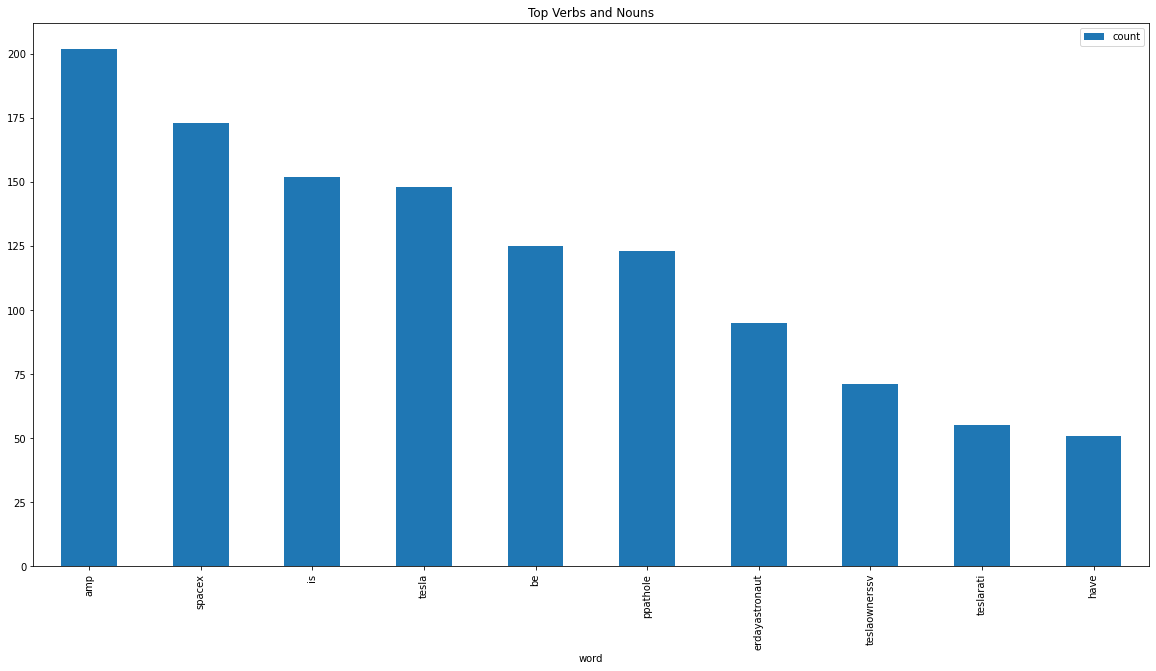

In [32]:
wf_df[0:10].plot.bar(x='word', figsize=(20,10), title='Top Verbs and Nouns')

# Sentiment Analysis

In [33]:
afinn = pd.read_csv('Afinn.csv',sep=',',encoding='latin-1')
afinn.shape

(2477, 2)

In [34]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [35]:
import nltk 
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Rohit
[nltk_data]     Chavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(" ".join(df))
sentence[0:10]

['im an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy  haha thanks flcnhvy  indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest geoffkeighley unrealengine its getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy this is true power haha freewalletorg any crypto wallet that wont give you your private keys should be avoided at all costs freewalletorg your app s

In [37]:
dataset

,text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
...,...
1994,flcnhvy true it sounds so surreal but the nega...
1995,ppathole make sure to read ur terms amp condit...
1996,teslagong ppathole samwise gamgee
1997,ppathole altho dumb and dumber is


In [38]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [39]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [40]:
dataset['sentiment_value'] = dataset['text'].apply(calculate_sentiment)

In [41]:
dataset

,text,sentiment_value
0,im an alien,0
1,idaacarmack ray tracing on cyberpunk with hdr ...,0
2,joerogan spotify great interview,3
3,doge is underestimated,-1
4,teslacn congratulations tesla china for amazin...,6
...,...,...
1994,flcnhvy true it sounds so surreal but the nega...,-3
1995,ppathole make sure to read ur terms amp condit...,1
1996,teslagong ppathole samwise gamgee,0
1997,ppathole altho dumb and dumber is,-6


# Sorting  Sentiment Tweets

#HIGH

In [42]:
dataset.sort_values(by='sentiment_value').tail(20)

,text,sentiment_value
298,techreview and increase fun hopefully,7
543,lrocket thanks for everything you did to help ...,7
1759,what i like most is their great sense of humor,7
1420,nextspaceflight good chance something will sli...,7
859,teslatino thanks to a great autopilotai team w...,7
1097,kristennetten flcnhvy one of my favorite write...,7
496,erdayastronaut spacex did great even reaching...,7
824,futurejurvetson ppathole super appreciate your...,7
462,pcgamer but it is visually stunning amp playab...,7
1582,teslaownerssv erdayastronaut not perfectly at ...,7


#LOW

In [44]:
dataset.sort_values(by='sentiment_value').head(20)

,text,sentiment_value
186,naval also the road to hell is mostly paved w...,-7
1273,tjlk there are some eerie parallels between th...,-6
1997,ppathole altho dumb and dumber is,-6
1717,neuroskeptic they dont fire all at once some g...,-6
893,pcgamer fear is best imo also dead space the...,-5
42,univercurious extremely misleading image as do...,-5
1063,tesladri chananbos wholemarsblog the crash ab...,-5
1393,lvaux kulpability tlowdon ethicalskeptic peopl...,-5
1574,universalsci asteroid impact risk is well unde...,-5
1975,rationaletienne flcnhvy ppathole ihearttesla d...,-5


# Sentiment Scores

In [45]:
dataset['sentiment_value'].describe()

count    1999.000000
mean        0.727364
std         1.820308
min        -7.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        12.000000
Name: sentiment_value, dtype: float64

# Top Scores

In [46]:
dataset[dataset['sentiment_value']>=10]

,text,sentiment_value
458,teslaownerssv it will get absurdly good tesla ...,10
468,picotjohn cyberpunkgame its a good to great ga...,10
1172,thanks tesla team for great work on deliveries...,10
1304,one way or another excitement guaranteed suppo...,11
1357,great trip to germany support from government ...,10
1388,gerberkawasaki wow i super loved astronomy but...,12


# Worst Scores

In [47]:
dataset[dataset['sentiment_value']<=-5].tail()

,text,sentiment_value
1533,ppathole the early investor part of tesla is w...,-5
1574,universalsci asteroid impact risk is well unde...,-5
1717,neuroskeptic they dont fire all at once some g...,-6
1975,rationaletienne flcnhvy ppathole ihearttesla d...,-5
1997,ppathole altho dumb and dumber is,-6


# Visualizing

C:\Users\Rohit Chavan\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

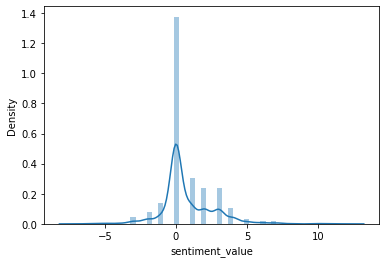

In [48]:
sns.distplot(dataset['sentiment_value'])

In [49]:
dataset['index'] = range(0,len(dataset))

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

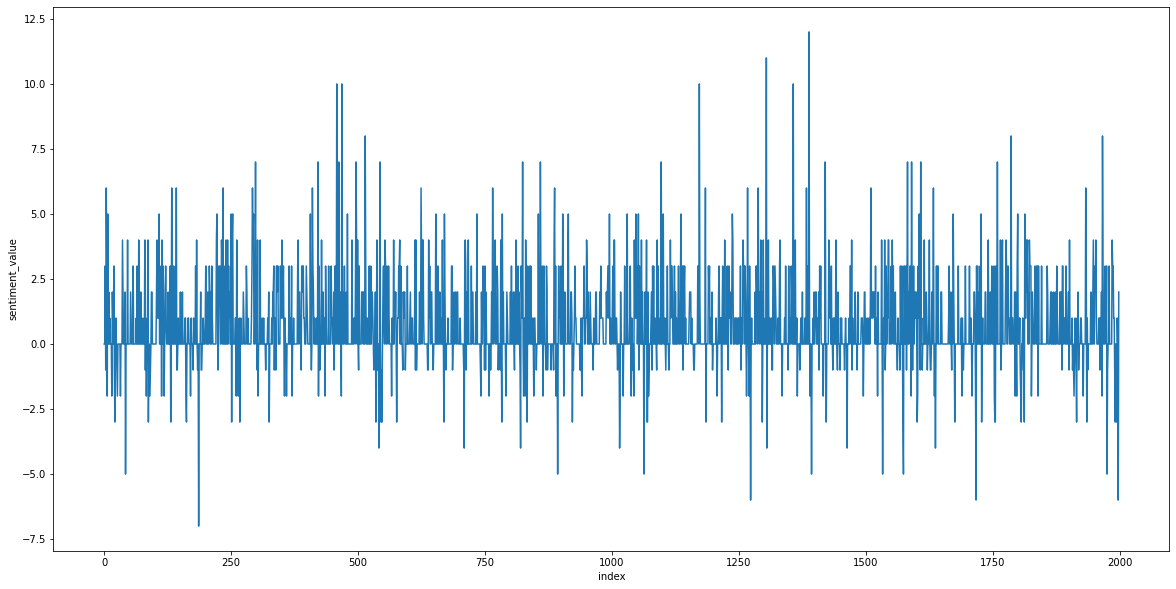

In [50]:
plt.figure(figsize=(20,10))
sns.lineplot(y='sentiment_value',x='index',data=dataset)

# Sentiment Value to Word Count

In [51]:
dataset['word_count'] = dataset['text'].str.split().apply(len)

In [52]:
dataset['word_count'].head()

0     3
1    13
2     4
3     3
4    17
Name: word_count, dtype: int64

<AxesSubplot:title={'center':'Sentiment value to Word Count'}, xlabel='word_count', ylabel='sentiment_value'>

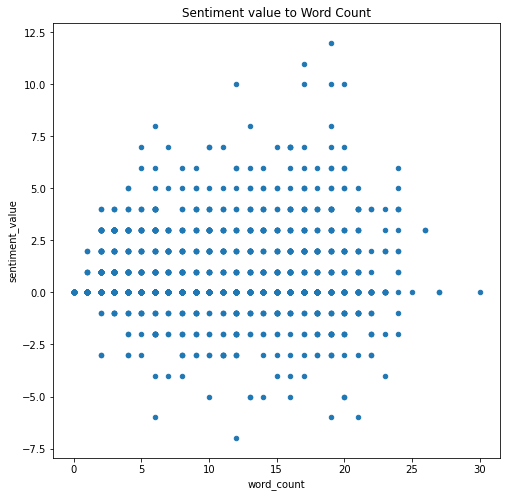

In [53]:
dataset.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentiment value to Word Count')